Индивидуальный проект: **Исследование рынка видеоигр**

Автор: **Чащин Д.**

Проверяющий: **Балакирев Илья**

Ссылка на датасет: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## Цель и задачи исследования

**Цель**: Выявление закономерностей, определяющих успешность игры.

## 2. Описание набора данных

Данные взяты из: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

### Описание данных 

Набор данных о цветке ириса представляет собой многомерный набор данных, представленный британским статистиком и биологом Рональдом Фишером в его статье 1936 года «Использование множественных измерений в таксономических задачах».
Набор данных состоит из 50 образцов каждого из трех видов ириса (Iris Setosa, Iris virginica и Iris versicolor). У каждого образца измеряли четыре характеристики: длину и ширину чашелистиков и лепестков в сантиметрах.

- Выборка включает 150 записей и 5 признаков.

- Количественные переменные:
  - **sepal_length** - длина чашелистика ( в сантиметрах)
  - **sepal_width** - ширина чашелистика (в сантиметрах)
  - **petal_length** - длина лепестка (в сантиметрах)
  - **petal_width** - ширина лепестка (в сантиметрах)
  
- Качественные переменные:
  - **species** - вид ириса
  

## 3. Разведочный анализ данных + визуализация

- выгрузка данных:


In [ ]:
import pandas as pd

iris_data = pd.read_csv('sample_data/IRIS.csv', na_values=['NA'])

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- визуализация данных:

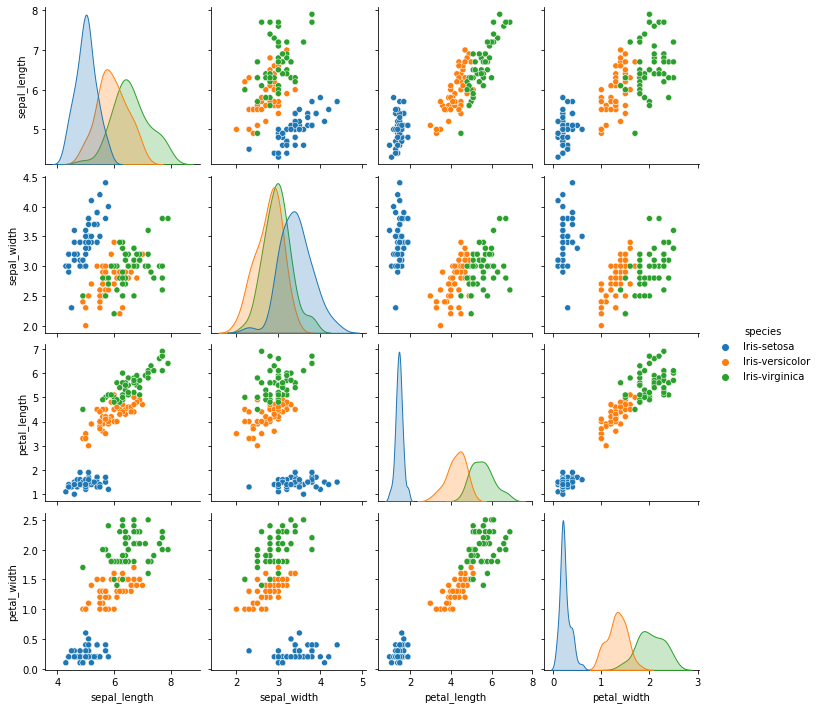

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb


sb.pairplot(iris_data.dropna(), hue='species')


- Проверка на пропуски:

In [ ]:
iris_data.loc[(iris_data['sepal_length'].isnull()) |
              (iris_data['sepal_width'].isnull()) |
              (iris_data['petal_length'].isnull()) |
              (iris_data['petal_width'].isnull())]

,sepal_length,sepal_width,petal_length,petal_width,species


Анализируя графики, можно сказать, что данные распределены нормально.

- Взаимодействие между параметрами:

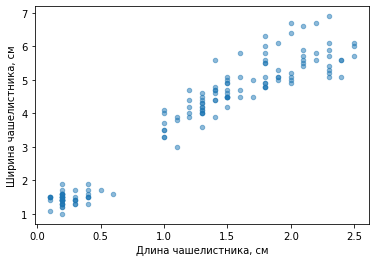

Корреляция -  0.96


In [ ]:
(iris_data).plot(x='petal_width', y='petal_length', kind='scatter', alpha=0.5)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.show()
print('Корреляция - ', iris_data['petal_length'].corr(iris_data['petal_width']).round(2))

Как можно видеть длина лепестка коррелирует с его шириной. Чем больше длина чашелистника, тем он шире.

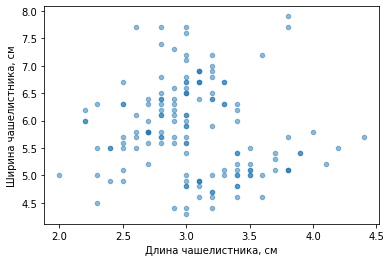

Корреляция -  -0.11


In [ ]:
(iris_data).plot(x='sepal_width', y='sepal_length', kind='scatter', alpha=0.5)
plt.xlabel('Длина чашелистника, см')
plt.ylabel('Ширина чашелистника, см')
plt.show()
print('Корреляция - ', iris_data['sepal_length'].corr(iris_data['sepal_width']).round(2))

А вот ширина чашелистника слабо коррелирует с длиной.

## 4. Выбор метода/алгоритма, модели, архитектуры (для НС)

Для задачи кластеризации выберем модель k-means.

K-means - алгоритм, основанный на расстоянии, где мы вычисляем расстояние, чтобы присвоить точку кластеру. В K-means каждый кластер связан с центроидом. 

Для начала методом локтя найдем оптимальное количество кластеров 

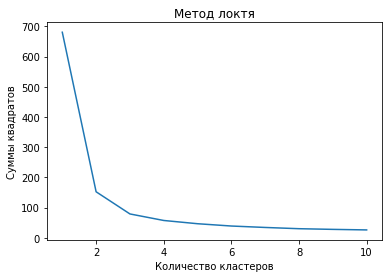

In [ ]:
from sklearn.cluster import KMeans
wcss = []
x = iris_data.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Суммы квадратов') 
plt.show()

 - Получаем, что оптимальной количество кластеров судя по графику  равно 3. Реализуем K-means. Построим графики

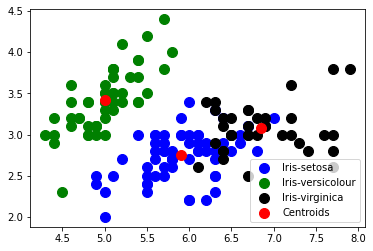

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'black', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

2 модель выберем для задачи классификации - decision tree.

## 5. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма

 - C помощью Grid Search настроим гиперпараметры для decision tree:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold


all_inputs = iris_data[['sepal_length', 'sepal_width',
                             'petal_length', 'petal_width']].values

all_labels = iris_data['species'].values


decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}



grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9666666666666668
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'splitter': 'best'}


## 6. Генерация наборов для обучения, тестирования и валидации

- Разделение выборки на обучающую и тестовую (70/30)

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.3, random_state=1)

- Кросс-валидация. Метод K-Fold. Пусть k = 10:


Text(0.5, 1.0, 'Average score: 0.9533333333333334')

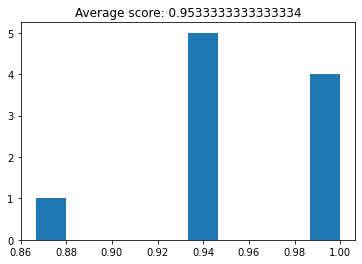

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()


cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Примерная точность - 95 %. 

обучение модели на лучших гиперпараметрах модели:

In [ ]:
import numpy as np

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

decision_tree_classifier.fit(training_inputs, training_classes)

decision_tree_classifier.score(testing_inputs, testing_classes)


0.9555555555555556

Наша модель достигла точности классификации ~ 96%.

## 7. Выводы

В этой работе были построены модели k-means для задачи кластеризации и decision tree для задачи классификации. Также были найдены корреляции между длиной и шириной лестка. Общая точность классификации составила 96%.